In [6]:
Packages <- c("dplyr", "broom", "gdata","lme4", "ape","vegan","viridis", "ggpubr","gridExtra", "colorRamps","ggplot2", "fields", "stringr", "reshape2", "splitstackshape", "readr", "dplyr", "tidyr", "stringr", "tidyverse", "tibble", "ggfortify", "lubridate", "RColorBrewer", "vegan", "vcfR")

invisible(suppressPackageStartupMessages(lapply(Packages, library, character.only = TRUE)))
"%!in%" <- function(x,table) match(x,table, nomatch = 0) == 0


setwd('/local/home/katrinac/migest')

source("~/scripts/conleyte.R")
source("~/scripts/conlabor.R")
#labor <- conlabor()
#leyte <- conleyte()

In [7]:
##read data as data frame
conndfall <- read.table("~/migest/input/conndfall.txt", header=TRUE, sep=",", stringsAsFactors=FALSE)
conndf12 <- read.table("~/migest/input/conndf2012.txt", header=TRUE, sep=",")
conndf13 <- read.table("~/migest/input/conndf2013.txt", header=TRUE, sep=",")
conndf14 <- read.table("~/migest/input/conndf2014.txt", header=TRUE, sep=",")
conndf15 <- read.table("~/migest/input/conndf2015.txt", header=TRUE, sep=",")
#all years together in one df
conndf_allyears <- read.table("~/migest/input/conndf_allyears.txt", header=TRUE, sep=",", stringsAsFactors=FALSE)
#change the years to numeric
conndf_allyears$year <- gsub("migration_rate", "20", conndf_allyears$year)


#read in connectivity matrices 

connmat_all <- read.table(file="~/migest/average_allyears/20180921_prop_samp_corr2/migest_conmat_all.txt", header=TRUE)
connmat12 <- read.table(file="~/migest/annual/2012/20180921_prop_samp_corr2/migest_conmat12_2.txt", header=TRUE)
connmat13 <- read.table(file="~/migest/annual/2013/20180921_prop_samp_corr2/migest_conmat13_2.txt", header=TRUE)
connmat14 <- read.table(file="~/migest/annual/2014/20180921_prop_samp_corr2/migest_conmat14_2.txt", header=TRUE)
connmat15 <- read.table(file="~/migest/annual/2015/20180921_prop_samp_corr2/migest_conmat15_2.txt", header=TRUE)


#read in a distance matrix
dist <- read.csv("~/parentage/kernel_fitting/distance_matrix_header.csv", header=TRUE,)
names(dist) <- gsub("\\.", " ", names(dist))

#read in the site codes
sites_all <- read.table(file="~/migest/average_allyears/20180921_prop_samp_corr2/input_sites_all.txt", header=TRUE)
sites_all$site <- gsub("_", " ", sites_all$site, fixed=TRUE)
sites12 <- read.table(file="~/migest/annual/2012/20180921_prop_samp_corr2/input_sites_2012.txt", header= TRUE)
sites12$site <- gsub("_", " ", sites12$site, fixed=TRUE)
sites13 <- read.table(file="~/migest/annual/2013/20180921_prop_samp_corr2/input_sites_2013.txt", header=TRUE)
sites13$site <- gsub("_", " ", sites13$site, fixed=TRUE)
sites14 <- read.table(file="~/migest/annual/2014/20180921_prop_samp_corr2/input_sites_2014.txt", header=TRUE)
sites14$site <- gsub("_", " ", sites14$site, fixed=TRUE)
sites15 <- read.table(file="~/migest/annual/2015/20180921_prop_samp_corr2/input_sites_2015.txt", header=TRUE)
sites15$site <- gsub("_", " ", sites15$site, fixed=TRUE)

#read in site area
area <- read.csv("~/parentage/kernel_fitting/site_area_header.csv", header=TRUE,)
area$site <- gsub("\\_", " ", area$site)

#make list of site names north to south to make distance and connectivity matrices compatible
sites_NS <- as.data.frame(dist$site, stringsAsFactors = FALSE) %>% rename(site="dist$site") 
sites_all_NS <- suppressWarnings(left_join(sites_NS, sites_all, by="site"))
#arrange annual site lists NS
sites12_NS <- suppressWarnings(inner_join(sites_NS, sites12, by="site"))
sites13_NS <- suppressWarnings(inner_join(sites_NS, sites13, by="site"))
sites14_NS <- suppressWarnings(inner_join(sites_NS, sites14, by="site"))
sites15_NS <- suppressWarnings(inner_join(sites_NS, sites15, by="site"))


#make distance matrix for all years connectivity
#prep matrices for mantel test

#sort sites NS
connmat_all_beta <- left_join(sites_all_NS, connmat_all, by=c(pop="Pop"))
connmat_all_NS <- connmat_all_beta %>%
    select(-Ghost, -pop) %>%
    t()

##filter the matrix to be symmetric
connmat_all_t <- as.data.frame(connmat_all_NS)
connmat_all_t$pop <- rownames(connmat_all_t)
connmat_all_t$pop <- gsub("Pop", "", connmat_all_t$pop)
connmat_all_t$pop <- as.numeric(connmat_all_t$pop)
connmat_all_NS <- left_join(sites_all_NS, connmat_all_t, by="pop") %>% #only sites sampled in given year
    select(-pop, -site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
class(connmat_all_NS) <- "numeric" #make numeric to convert to Bray distance matrix



#annual
#2012
connmat12_noghost <- connmat12 %>%
    select(-Ghost)
connmat12_beta <- left_join(sites12_NS, connmat12_noghost, by=c(pop="Pop")) %>% #only sites sampled in given year 
    select(-pop, -site) %>% #drop site/pop columns, only needed it to sort
    t()
##filter the matrix to be symmetric
connmat12_t <- as.data.frame(connmat12_beta)
connmat12_t$pop <- rownames(connmat12_t)
connmat12_t$pop <- gsub("Pop", "", connmat12_t$pop)
connmat12_t$pop <- as.numeric(connmat12_t$pop)
connmat12_NS <- left_join(sites12_NS, connmat12_t, by="pop") %>% #only sites sampled in given year
    select(-pop, -site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
class(connmat12_NS) <- "numeric"


#2013
connmat13_noghost <- connmat13 %>%
    select(-Ghost)
connmat13_beta <- left_join(sites13_NS, connmat13_noghost, by=c(pop="Pop")) %>% #only sites sampled in given year 
    select(-pop, -site) %>% #drop site/pop columns, only needed it to sort
    t()
##filter the matrix to be symmetric
connmat13_t <- as.data.frame(connmat13_beta)
connmat13_t$pop <- rownames(connmat13_t)
connmat13_t$pop <- gsub("Pop", "", connmat13_t$pop)
connmat13_t$pop <- as.numeric(connmat13_t$pop)
connmat13_NS <- left_join(sites13_NS, connmat13_t, by="pop") %>% #only sites sampled in given year
    select(-pop, -site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
class(connmat13_NS) <- "numeric"


#2014
connmat14_noghost <- connmat14 %>%
    select(-Ghost)
connmat14_beta <- left_join(sites14_NS, connmat14_noghost, by=c(pop="Pop")) %>% #only sites sampled in given year 
    select(-pop, -site) %>% #drop site/pop columns, only needed it to sort
    t()
##filter the matrix to be symmetric
connmat14_t <- as.data.frame(connmat14_beta)
connmat14_t$pop <- rownames(connmat14_t)
connmat14_t$pop <- gsub("Pop", "", connmat14_t$pop)
connmat14_t$pop <- as.numeric(connmat14_t$pop)
connmat14_NS <- left_join(sites14_NS, connmat14_t, by="pop") %>% #only sites sampled in given year
    select(-pop, -site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
class(connmat14_NS) <- "numeric"


#2015
connmat15_noghost <- connmat15 %>%
    select(-Ghost)
connmat15_beta <- left_join(sites15_NS, connmat15_noghost, by=c(pop="Pop")) %>% #only sites sampled in given year 
    select(-pop, -site) %>% #drop site/pop columns, only needed it to sort
    t()
##filter the matrix to be symmetric
connmat15_t <- as.data.frame(connmat15_beta)
connmat15_t$pop <- rownames(connmat15_t)
connmat15_t$pop <- gsub("Pop", "", connmat15_t$pop)
connmat15_t$pop <- as.numeric(connmat15_t$pop)
connmat15_NS <- left_join(sites15_NS, connmat15_t, by="pop") %>% #only sites sampled in given year
    select(-pop, -site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
class(connmat15_NS) <- "numeric"







Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [40]:
# estimates of N produced in ~/parentage/notebooks/proportion_sampled_working.ipynb
abundance <- read.csv(file="~/migest/input/20181017_nadult_estimate.csv", header=TRUE)
#change year to match abundance as character
abundance$year <- as.character(abundance$year)

In [41]:
emig_abundance <- inner_join(conndf_allyears, abundance, by=c(source="site", "year")) %>%
    rename(adult_abundance = Ntotal_bestEst) %>%
    select(-n_captured_fish, -mean_prob_r, -prop_habitat_sampled)
    

ERROR: Error in inner_join_impl(x, y, by$x, by$y, suffix$x, suffix$y, check_na_matches(na_matches)): Can't join on 'year' x 'year' because of incompatible types (numeric / character)


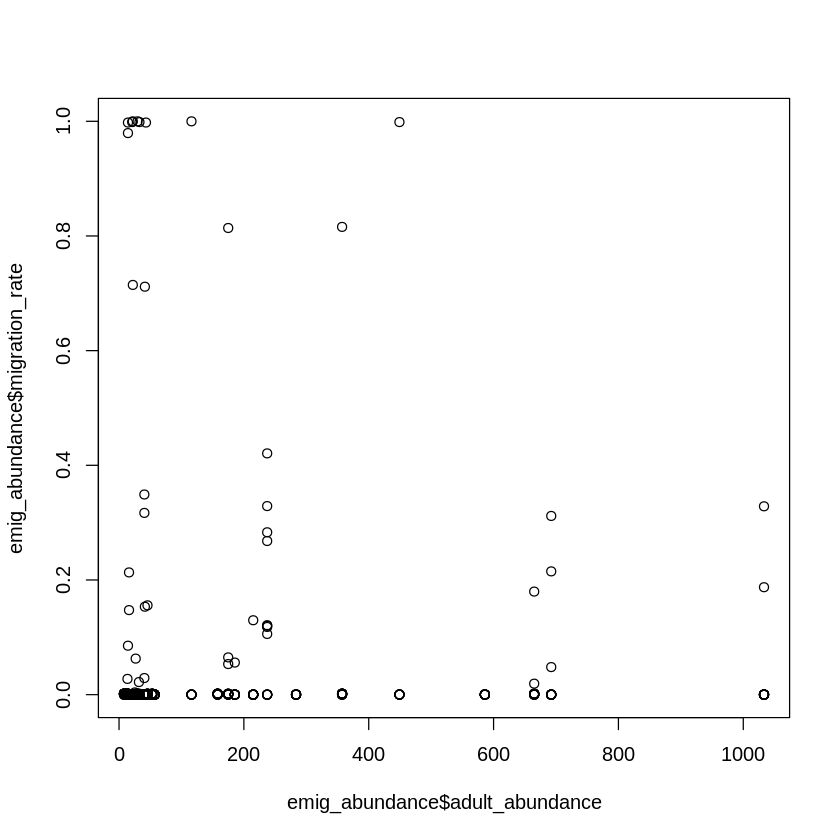

In [42]:
plot(emig_abundance$adult_abundance, emig_abundance$migration_rate)

In [43]:
emig_abundance_mod <- lm(migration_rate ~ adult_abundance, data= emig_abundance)

In [44]:
summary(emig_abundance_mod)


Call:
lm(formula = migration_rate ~ adult_abundance, data = emig_abundance)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.04568 -0.03105 -0.03051 -0.03031  0.96927 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.030e-02  7.635e-03   3.968 8.24e-05 ***
adult_abundance 1.489e-05  2.818e-05   0.528    0.598    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1502 on 528 degrees of freedom
  (114 observations deleted due to missingness)
Multiple R-squared:  0.0005281,	Adjusted R-squared:  -0.001365 
F-statistic: 0.279 on 1 and 528 DF,  p-value: 0.5976


## so there's no relationship between adult abundances and export rates, at least with these measures of N?

### what about just self-recruitment rates?

In [45]:
self_abundance <- filter(emig_abundance, source==destination)
self_abundance_mod <- lm(migration_rate ~ adult_abundance, data= self_abundance)

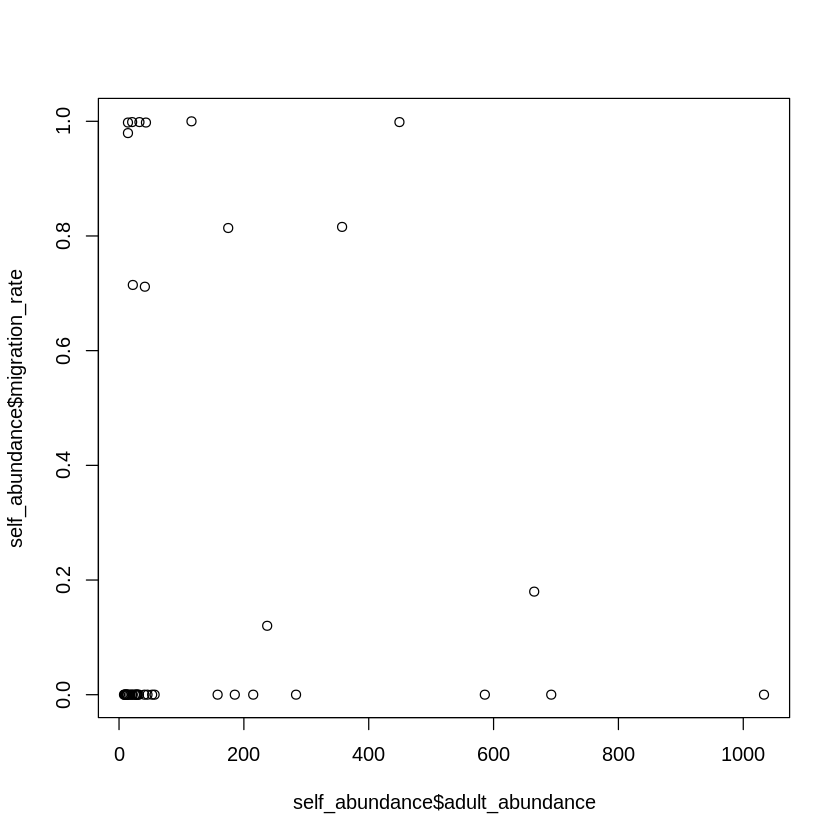

In [46]:
plot(self_abundance$adult_abundance, self_abundance$migration_rate)

In [47]:
summary(self_abundance_mod)


Call:
lm(formula = migration_rate ~ adult_abundance, data = self_abundance)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.2459 -0.2454 -0.2439  0.2151  0.7723 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)      2.463e-01  7.299e-02   3.375  0.00163 **
adult_abundance -4.453e-05  2.777e-04  -0.160  0.87337   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4087 on 41 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.000627,	Adjusted R-squared:  -0.02375 
F-statistic: 0.02572 on 1 and 41 DF,  p-value: 0.8734


## to verify this-- are adult abundances significantly different from one another?

In [50]:
df_self_lm = self_abundance %>% 
    group_by(source) %>%
    do(fit_year = lm(adult_abundance ~ year, data =self_abundance))

# get the coefficients by group in a tidy data_frame
df_self_coef = tidy(df_self_lm, fit_year)
df_self_coef

source,term,estimate,std.error,statistic,p.value
Cabatoan,(Intercept),8834.782117,69545.04178,0.1270368,0.8995322
Cabatoan,year,-4.319582,34.53758,-0.1250690,0.9010801
Caridad Cemetery,(Intercept),8834.782117,69545.04178,0.1270368,0.8995322
Caridad Cemetery,year,-4.319582,34.53758,-0.1250690,0.9010801
Elementary School,(Intercept),8834.782117,69545.04178,0.1270368,0.8995322
Elementary School,year,-4.319582,34.53758,-0.1250690,0.9010801
Haina,(Intercept),8834.782117,69545.04178,0.1270368,0.8995322
Haina,year,-4.319582,34.53758,-0.1250690,0.9010801
Hicgop South,(Intercept),8834.782117,69545.04178,0.1270368,0.8995322
Hicgop South,year,-4.319582,34.53758,-0.1250690,0.9010801


In [39]:
str(self_abundance)

'data.frame':	46 obs. of  5 variables:
 $ destination    : chr  "Cabatoan" "Caridad Cemetery" "Elementary School" "Haina" ...
 $ source         : chr  "Cabatoan" "Caridad Cemetery" "Elementary School" "Haina" ...
 $ year           : num  2013 2013 2013 2013 2013 ...
 $ migration_rate : num  1e-04 1e-04 1e-04 1e-04 1e-04 ...
 $ adult_abundance: num  40.56 11.93 8.94 214.95 57 ...
